In [1]:
import pandas as pd
import numpy as np
import warnings
import scipy as sp
import re
from tqdm.auto import tqdm
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("archive\\date-hour-soo-dest-2022.csv",header=None)

In [3]:
df.head()

,0,1,2,3,4
0,2022-01-01,0,12TH,12TH,1
1,2022-01-01,0,12TH,16TH,1
2,2022-01-01,0,12TH,24TH,2
3,2022-01-01,0,12TH,ASHB,1
4,2022-01-01,0,12TH,MONT,1


In [4]:
df.columns = ["date", "hour", "origin_station", "destination_station","trip_count"]

In [5]:
df[df['hour'].isin([7,8,9,17,18,19])]

,date,hour,origin_station,destination_station,trip_count
943,2022-01-01,7,12TH,12TH,3
944,2022-01-01,7,12TH,24TH,1
945,2022-01-01,7,12TH,BAYF,1
946,2022-01-01,7,12TH,CIVC,1
947,2022-01-01,7,12TH,DELN,3
...,...,...,...,...,...
4713589,2022-08-02,19,WOAK,SBRN,3
4713590,2022-08-02,19,WOAK,SFIA,4
4713591,2022-08-02,19,WOAK,SHAY,1
4713592,2022-08-02,19,WOAK,WDUB,1


In [6]:
df.head()

,date,hour,origin_station,destination_station,trip_count
0,2022-01-01,0,12TH,12TH,1
1,2022-01-01,0,12TH,16TH,1
2,2022-01-01,0,12TH,24TH,2
3,2022-01-01,0,12TH,ASHB,1
4,2022-01-01,0,12TH,MONT,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717209 entries, 0 to 4717208
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   date                 object
 1   hour                 int64 
 2   origin_station       object
 3   destination_station  object
 4   trip_count           int64 
dtypes: int64(2), object(3)
memory usage: 179.9+ MB


In [8]:
df.isnull().sum()

date                   0
hour                   0
origin_station         0
destination_station    0
trip_count             0
dtype: int64

In [9]:
df['date']=pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

In [10]:
df.head()

,date,hour,origin_station,destination_station,trip_count,day,weekday,month,year
0,2022-01-01,0,12TH,12TH,1,1,Saturday,January,2022
1,2022-01-01,0,12TH,16TH,1,1,Saturday,January,2022
2,2022-01-01,0,12TH,24TH,2,1,Saturday,January,2022
3,2022-01-01,0,12TH,ASHB,1,1,Saturday,January,2022
4,2022-01-01,0,12TH,MONT,1,1,Saturday,January,2022


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
df['weekday'].nunique()

7

In [13]:
df['trip_count'].nunique()

248

In [14]:
df['month'].nunique()

8

In [15]:
df['hour'].nunique()

24

<AxesSubplot:xlabel='hour', ylabel='trip_count'>

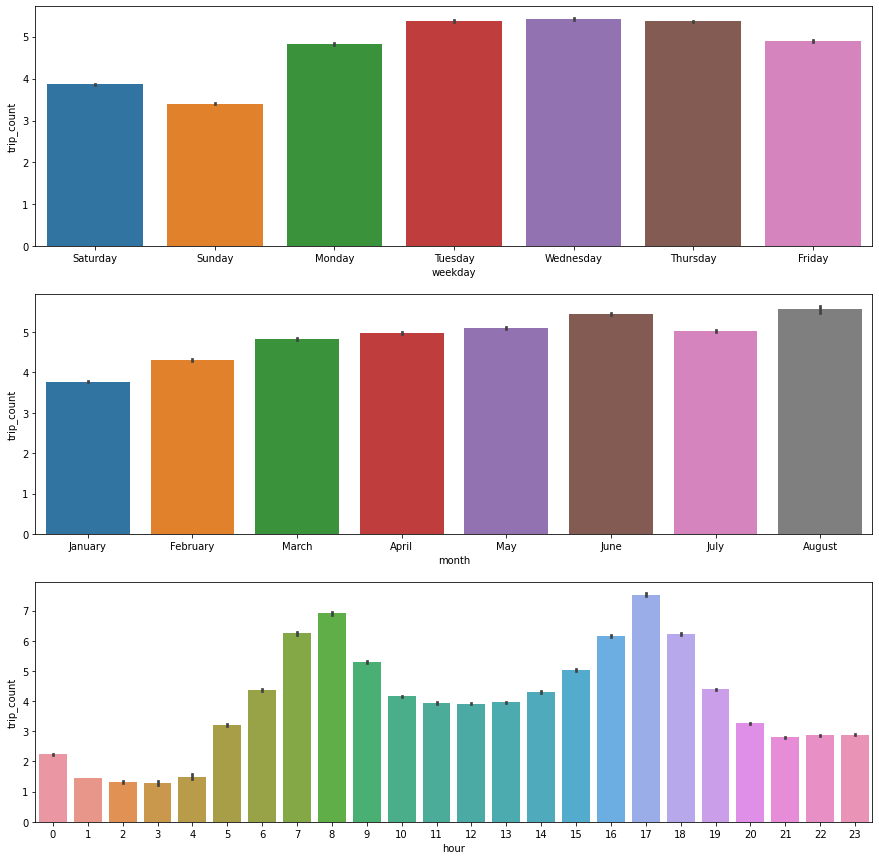

In [16]:
fig, ax = plt.subplots(3, 1, figsize = (15,15))
sns.barplot(ax=ax[0],x=df['weekday'],y=df['trip_count'])
sns.barplot(ax=ax[1],x=df['month'],y=df['trip_count'])
sns.barplot(ax=ax[2],x=df['hour'],y=df['trip_count'])


In [17]:
df["route"] = df["origin_station"] + "-" +  df["destination_station"]

In [18]:
df["origin_station"].nunique()

50

In [19]:
df.head()

,date,hour,origin_station,destination_station,trip_count,day,weekday,month,year,route
0,2022-01-01,0,12TH,12TH,1,1,Saturday,January,2022,12TH-12TH
1,2022-01-01,0,12TH,16TH,1,1,Saturday,January,2022,12TH-16TH
2,2022-01-01,0,12TH,24TH,2,1,Saturday,January,2022,12TH-24TH
3,2022-01-01,0,12TH,ASHB,1,1,Saturday,January,2022,12TH-ASHB
4,2022-01-01,0,12TH,MONT,1,1,Saturday,January,2022,12TH-MONT


In [20]:
import plotly.express as px

In [21]:
total_trip = df.groupby(["destination_station"]).sum()["trip_count"] + df.groupby(["origin_station"]).sum()["trip_count"]
total_trip.index.name = "total_trip"
trip_perc = (total_trip / total_trip.sum())*100

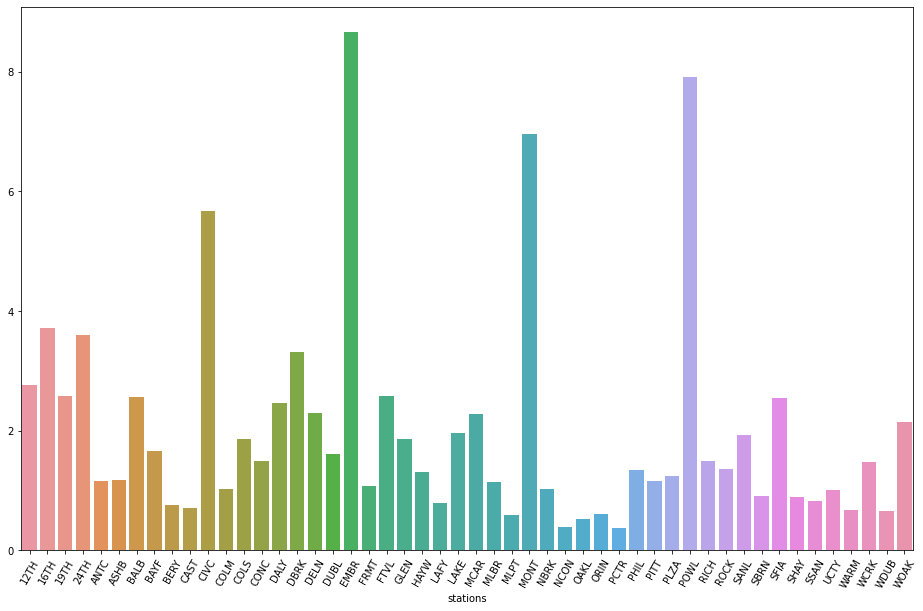

In [22]:
plt.figure(figsize=(16,10))
ax = sns.barplot(trip_perc.index, trip_perc.values)
ax.set_xlabel("stations", )
plt.xticks(rotation=60)
plt.show()

In [23]:
df["route"].value_counts().sort_values(ascending=True)

ORIN-WDUB      27
CAST-NCON      35
WDUB-ORIN      35
WDUB-NCON      39
MLBR-BERY      44
             ... 
POWL-BALB    4144
POWL-24TH    4155
POWL-FTVL    4162
POWL-DALY    4163
EMBR-EMBR    4221
Name: route, Length: 2500, dtype: int64

In [24]:
route_trip = df["route"].value_counts()
route_perc = (route_trip / route_trip.sum())*100
route_perc = route_perc.sort_values(ascending=True)

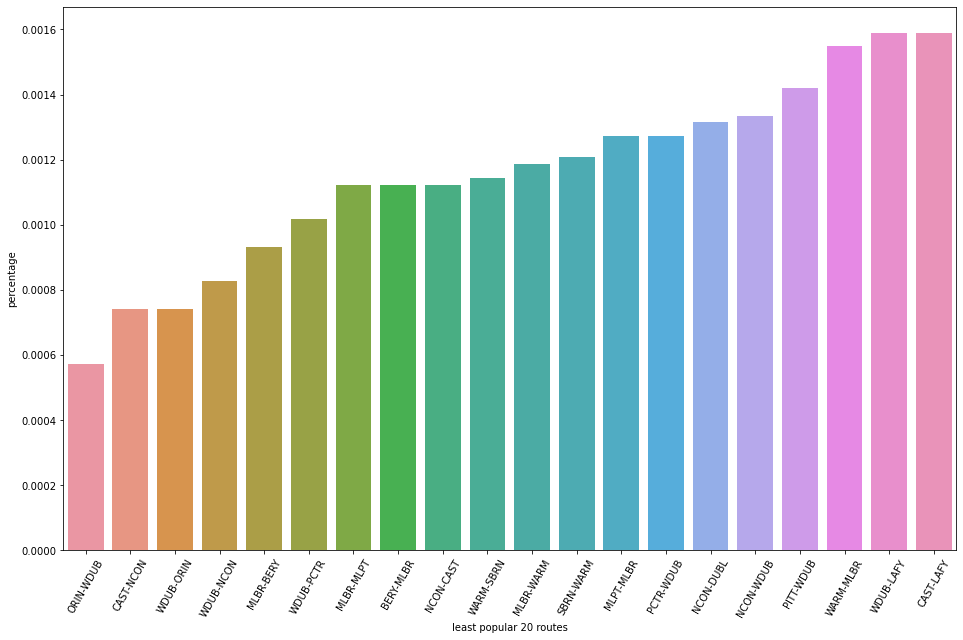

In [25]:
plt.figure(figsize=(16,10))
ax = sns.barplot(route_perc.index[:20], route_perc.values[:20])
ax.set_ylabel("percentage", )
ax.set_xlabel("least popular 20 routes", )
plt.xticks(rotation=60)
plt.show()

In [26]:
df_station = pd.read_csv("archive\station_info.csv")

In [27]:
def match(x,text):
    ismatch= re.search(text, x.lower())
    if ismatch is not None:
        return True
    else:
        return False

In [28]:
isfrancisco = df_station["Description"].apply(match, args=("francisco",))
isberkeley = df_station["Description"].apply(match, args=("berkeley",))
sf_station = df_station["Abbreviation"].where(isfrancisco).dropna().tolist()
be_station = df_station["Abbreviation"].where(isberkeley).dropna().tolist()
route = [stbe+"-" + stsf for stsf in sf_station for stbe in be_station]

In [29]:
isroute = [True if (element in route) else False for element in df["route"]]

In [30]:
s = df[isroute].groupby(by=["route"]).sum()["trip_count"].sort_values(ascending=True)[:10]

## Least busiest Berkeley to San Francisco routes

In [31]:
s

route
NBRK-SSAN     427
ASHB-COLM     489
NBRK-COLM     531
ASHB-SSAN     545
PLZA-COLM     551
PLZA-SSAN     661
PLZA-WOAK     961
NBRK-WOAK    1170
PLZA-BALB    1708
NBRK-BALB    1998
Name: trip_count, dtype: int64

In [32]:
x = df[isroute].groupby(by=["route"]).sum()["trip_count"].index
y = df[isroute].groupby(by=["route"]).sum()["trip_count"].values

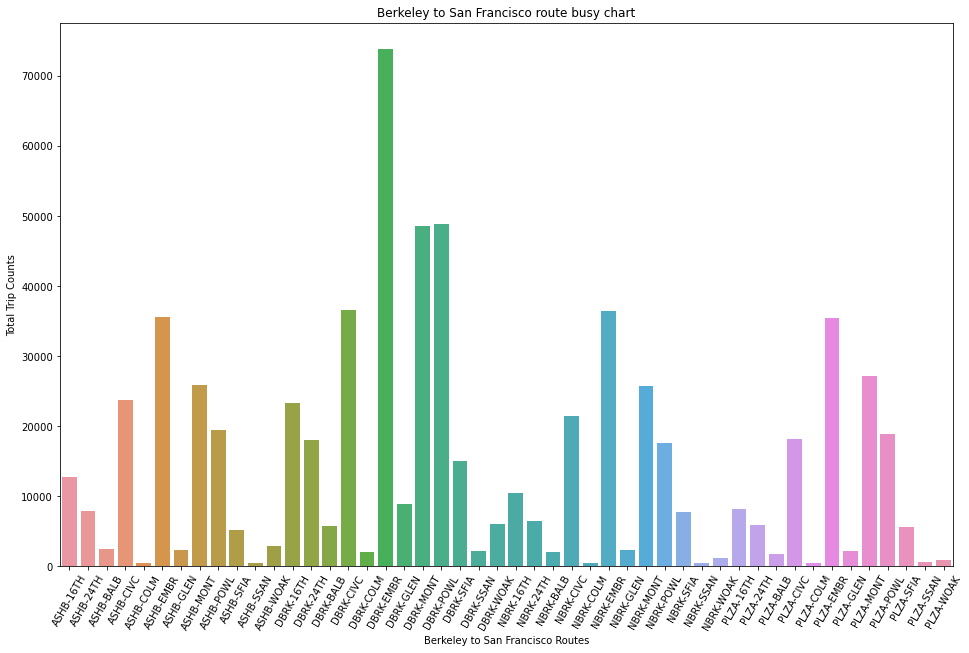

In [33]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x, y)
ax.set_ylabel("Total Trip Counts")
ax.set_xlabel("Berkeley to San Francisco Routes")
ax.set_title("Berkeley to San Francisco route busy chart")
plt.xticks(rotation=60)
plt.show()

In [34]:
df_station["Location"][0].split(",")

['-122.271450', '37.803768', '0']

In [35]:
latitude, longitude = [], []
def coordinate(x):
    x = x.split(",")
    latitude.append(np.radians(float(x[0])))
    longitude.append(np.radians(float(x[1])))

df_station["Location"].apply(coordinate)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
Name: Location, dtype: object

In [36]:
coordinates = pd.DataFrame({"latitude":latitude, "longitude":longitude})

In [37]:
coordinates["station"] = df_station["Abbreviation"]
new_cols = ["station","latitude","longitude"]
coordinates=coordinates.reindex(columns=new_cols)

In [38]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('haversine')

In [39]:
cm = pd.DataFrame(dist.pairwise(coordinates[['latitude','longitude']].to_numpy())*6373)

In [40]:
cm.columns= df_station["Abbreviation"]
cm.index = df_station["Abbreviation"]

In [41]:
cm.index.name, cm.columns.name = None, None

In [42]:
cm #By kilometer

,12TH,16TH,19TH,24TH,ASHB,BALB,BAYF,CAST,CIVC,COLS,...,SANL,SBRN,SFIA,SHAY,SSAN,UCTY,WARM,WCRK,WDUB,WOAK
12TH,0.000000,16.649263,0.417606,16.599750,2.916177,20.184626,17.320381,22.789456,15.933818,8.812190,...,13.224841,18.897808,17.488009,25.856916,20.908767,30.946517,41.020730,23.469139,38.667044,2.635851
16TH,16.649263,0.000000,17.002214,0.770436,17.443356,4.036924,32.860498,38.526595,1.071982,24.794053,...,28.905594,7.600336,9.391478,41.060204,6.591864,45.928429,55.655763,40.048484,54.801017,14.055356
19TH,0.417606,17.002214,0.000000,16.962545,2.644858,20.558889,17.128689,22.569030,16.275605,8.613275,...,13.034972,19.310301,17.905568,25.672730,21.308065,30.769859,40.854628,23.093955,38.398623,2.959040
24TH,16.599750,0.770436,16.962545,0.000000,17.519791,3.749864,32.605159,38.276472,1.685912,24.612372,...,28.676732,6.842998,8.625595,40.755700,5.995176,45.597325,55.285377,40.042565,54.581193,14.032715
ASHB,2.916177,17.443356,2.644858,17.519791,0.000000,21.226735,18.447059,23.663690,16.603329,10.043656,...,14.414890,20.695045,19.587940,26.979892,22.363634,32.103000,42.226364,22.743238,39.082085,3.986085
BALB,20.184626,4.036924,20.558889,3.749864,21.226735,0.000000,35.733938,41.407321,5.081160,27.943502,...,31.885374,6.087774,8.787872,43.722411,3.444414,48.468609,58.002360,43.652778,57.772350,17.658538
BAYF,17.320381,32.860498,17.128689,32.605159,18.447059,35.733938,0.000000,5.674695,32.366474,8.516144,...,4.095606,32.422348,29.963461,8.551142,35.362802,13.665432,23.782033,13.965808,22.054617,19.818141
CAST,22.789456,38.526595,22.569030,38.276472,23.663690,41.407321,5.674695,0.000000,38.022145,13.992739,...,9.659322,38.024576,35.516565,3.908413,41.002596,8.765901,18.799064,12.716554,16.399653,25.338040
CIVC,15.933818,1.071982,16.275605,1.685912,16.603329,5.081160,32.366474,38.022145,0.000000,24.214771,...,28.380615,8.468419,10.055679,40.627556,7.646293,45.531108,55.312807,39.267743,54.251834,13.318796
COLS,8.812190,24.794053,8.613275,24.612372,10.043656,27.943502,8.516144,13.992739,24.214771,0.000000,...,4.425583,25.359698,23.238229,17.063766,27.993568,22.168493,32.268758,16.961467,30.048602,11.345325


In [43]:
df["weekday"].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [44]:
df

,date,hour,origin_station,destination_station,trip_count,day,weekday,month,year,route
0,2022-01-01,0,12TH,12TH,1,1,Saturday,January,2022,12TH-12TH
1,2022-01-01,0,12TH,16TH,1,1,Saturday,January,2022,12TH-16TH
2,2022-01-01,0,12TH,24TH,2,1,Saturday,January,2022,12TH-24TH
3,2022-01-01,0,12TH,ASHB,1,1,Saturday,January,2022,12TH-ASHB
4,2022-01-01,0,12TH,MONT,1,1,Saturday,January,2022,12TH-MONT
...,...,...,...,...,...,...,...,...,...,...
4717204,2022-08-02,23,WOAK,MCAR,1,2,Tuesday,August,2022,WOAK-MCAR
4717205,2022-08-02,23,WOAK,MONT,1,2,Tuesday,August,2022,WOAK-MONT
4717206,2022-08-02,23,WOAK,NBRK,1,2,Tuesday,August,2022,WOAK-NBRK
4717207,2022-08-02,23,WOAK,POWL,2,2,Tuesday,August,2022,WOAK-POWL


In [45]:
x = [1,2,3,4]
x.reverse()
x

[4, 3, 2, 1]

In [46]:
y = "12TH-24TH".split("-")
y.reverse()
y = "-".join(y)
y

'24TH-12TH'

In [47]:
def findcommit(x):
    y = x.split("-")
    y.reverse()
    y = "-".join(y)
    df_a= df.loc[df["weekday"].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday'])]
    df_bg = df_a[df_a["route"]==x].loc[df_a["hour"].isin([7,8,9])].groupby(by=["date"])
    df_bgg = (df_bg.sum()-df_bg.mean())["trip_count"]
    df_bgg.name = "go"
    df_bc = df_a[df_a["route"]==y].loc[df_a["hour"].isin([17,18,19])].groupby(by=["date"])
    df_bcc = (df_bc.sum()-df_bc.mean())["trip_count"]
    df_bcc.name = "come"
    frame = {"go":df_bgg, "come":df_bcc}
    df_calc = pd.DataFrame(frame)

    df_calc["day"] = df_calc.index.day.tolist()
    df_calc["weekday"] = df_calc.index.day_name().tolist()
    df_calc["month"] = df_calc.index.month_name().tolist()
    df_calc["route"] = x


    from statistics import variance as vr
    commitlist = []
    df_calc.dropna(inplace=True)
    for index, row in df_calc.iterrows():
        ego =  row["go"]
        ecome = row["come"]
        if vr([ego,ecome]) < 5:
            commitlist.append(round((ego+ecome)/2))
        else:
            commitlist.append(round(ego))
    df_calc.reset_index(inplace=True)
    df_calc["commit"]= commitlist
    
    return df_calc

In [48]:
df_com = pd.read_csv("commit.csv")

In [49]:
df_com = df_com.astype({"day":"category", "weekday":"category","month":"category","route":"category"})

In [50]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280057 entries, 0 to 280056
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Unnamed: 0  280057 non-null  int64   
 1   date        280057 non-null  object  
 2   go          280057 non-null  float64 
 3   come        280057 non-null  float64 
 4   day         280057 non-null  category
 5   weekday     280057 non-null  category
 6   month       280057 non-null  category
 7   route       280057 non-null  category
 8   commit      280057 non-null  float64 
dtypes: category(4), float64(3), int64(1), object(1)
memory usage: 12.1+ MB


In [51]:
y, X = df_com["commit"], df_com[["weekday","month","day","route"]]

In [52]:
X_dummied = pd.get_dummies(X, drop_first=True)

In [53]:
X_dummied

,weekday_Monday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_August,month_February,month_January,month_July,month_June,month_March,...,route_WOAK-SANL,route_WOAK-SBRN,route_WOAK-SFIA,route_WOAK-SHAY,route_WOAK-SSAN,route_WOAK-UCTY,route_WOAK-WARM,route_WOAK-WCRK,route_WOAK-WDUB,route_WOAK-WOAK
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280052,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
280053,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
280054,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
280055,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [55]:
en, l, lr, r, sg, br, kr = ElasticNet(), Lasso(), LinearRegression(), Ridge(), SGDRegressor(), BayesianRidge(), KernelRidge()
gbr = GradientBoostingRegressor()

In [56]:
algorithms = [en, l, lr, r, br,gbr]
names = ["ElasticNet", "Lasso", "Linear", "Ridge", "BayesianRidge",
        "GradientBoosting"]
r2score = []
mse = []
regressor = []
def regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=101)
    for i in tqdm(range(len(algorithms))):
        algorithms[i].fit(X_train,y_train)
    for i in tqdm(range(len(algorithms))):
        r2score.append("%.2f" % (r2_score(y_test, algorithms[i].predict(X_test))*100))
        mse.append("%.2f" % (mean_squared_error(y_test,algorithms[i].predict(X_test)))**0.5)
        regressor.append(names[i])


    met= pd.DataFrame(columns= ["Regressor","r2_score", "mse"])
    met["Regressor"] = regressor
    met["r2_score"] = r2score
    met["mse"] = mse
    return met.sort_values(by=["r2_score"], ascending=False)

In [57]:
regression(X_dummied,y)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

,Regressor,r2_score,mse
4,BayesianRidge,88.40,7.88
3,Ridge,88.34,7.90
5,GradientBoosting,46.99,16.84
2,Linear,-1190188260126246356123648.00,2523614544215.94
0,ElasticNet,-0.00,23.13
1,Lasso,-0.00,23.13
